# Assessment Problems

In [3]:
# Binomial distribution.# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Data manipulation and analysis.
# https://pandas.pydata.org/docs/
import pandas as pd

# Numerical structures and operations.
# https://numpy.org/doc/
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical models.
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm

## Problem 1: Extending the Lady Tasting Tea

The experiment has 12 cups: 4 tea-first and 8 milk-first. A participant claims they can tell which was poured first. Calculate the probability of the participant correctly identifying all cups by chance and compare it to the original 8-cup experiment (4 Tea-first, 4 Milk-first).The probability of a perfect score by chance is given by the combinatorial formula:$$P(\text{Perfect Score}) = \frac{\binom{\text{Milk}}{\text{Chosen Milk}} \times \binom{\text{Tea}}{\text{Chosen Tea}}}{\binom{\text{Total Cups}}{\text{Cups Chosen}}} = \frac{\binom{4}{4} \times \binom{8}{0}}{\binom{12}{4}}$$

In [4]:
# problem 1 : Lady Tasting Tea experiment
# Author: Finian Doonan

## Simulating the “Tea-First vs Milk-First” Experiment

A participant claims they can tell which of 12 cups were poured **tea-first** versus **milk-first**.  

We will simulate this experiment to estimate the probability of correctly identifying all cups **by chance**.

### Steps

1. **Prepare the cups**
   - Total cups: 12
   - Tea-first: 8 cups
   - Milk-first: 4 cups

2. **Simulation procedure**
   - Randomly **shuffle the cups** to simulate a participant guessing
   - Repeat this process **many times** (e.g., 100,000 simulations)
   - For each shuffle, check if the participant **correctly identifies all 12 cups**
   - Record the proportion of successful guesses  
     → This gives the **probability of guessing all cups correctly by chance**

3. **Comparison**
   - Compare this probability with the **original 8-cup experiment**
   - Observe how increasing the number of cups **reduces the chance of guessing correctly**

### Objective

This simulation illustrates:
- How **random chance affects experimental outcomes**
- How **increasing the number of trials** makes it harder to succeed purely by guessing
- The importance of **simulating experiments** to estimate probabilities in complex scenarios


## Permutations and combinations.

In [5]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of simulations to run.
no_simulations = 100000

successes = 0
for _ in range(no_simulations):
    # Create cups.
    cups = ['milk_first'] * no_cups_milk_first + ['tea_first'] * no_cups_tea_first

    # Shuffle cups.
    random.shuffle(cups)

    # Lady's selection (first four cups).
    lady_selection = cups[:4]

    # Count milk first in lady's selection.
    milk_first_count = lady_selection.count('milk_first')

    # Check if lady was correct (i.e., selected all four milk first cups).
    if milk_first_count == no_cups_milk_first:
        successes += 1

# Calculate probability of success.
prob = successes / no_simulations   
# Show probability.
prob

0.00223

The probability of success in this case is 0.00195

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [6]:
# Number of cups of tea in total.
n = 12

In [7]:
# Number of cups of tea with milk in first.
k = 4

In [8]:
# Number of ways of selecting four cups from eight.
number_ways = math.comb(no_cups, no_cups_milk_first)

# Show.
number_ways

495

there are 495 combinations if you are selecting 4 items from 12.

In [9]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

There are 11,880 ways to select 4 cups from 12 if the order matters, because each different sequence of the same cups counts as a separate arrangement.

In [10]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

There are 24 ways to shuffle 4 cups, because each of the 4 positions can be filled in decreasing order (4 choices for the first, 3 for the second, 2 for the third, 1 for the last).

In [11]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

In [12]:
prob = successes / no_simulations

print(f"Simulated probability of success: {prob:.6f}")

Simulated probability of success: 0.002230


## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [13]:
# Eight factorial.
math.factorial(n)

479001600

In [14]:
# Four factorial.
math.factorial(k)

24

In [15]:
# Four factorial.
math.factorial(n - k)

40320

In [16]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))#

495

So by pure chance, there’s only about a 0.2% chance (1 in 495) of correctly identifying all cups.

In [17]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [18]:
# Correct usage: pass the sequence (or an integer) to np.random.permutation.
# Use the existing `labels` list to get a shuffled ordering of the cups.
shuffled = np.random.permutation(labels)
shuffled

array([11,  2,  4,  3,  1,  0,  8,  5, 10,  7,  9,  6])

In [19]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [20]:
# Number of combinations.
len(combs)

495

By increasing to 12 cups (8T, 4M), the chance drops to 0.2%, roughly 7 times less likely to get all right by luck.

In [21]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[3, 4, 5, 9]

## The Null Hypothesis


- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the twelve, cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [22]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [23]:
# The probability that she (randomly) selects at least three correct cups.
( 16+ 1) / 495

0.03434343434343434

Solution

The calculation of the probability of a perfect score under the null hypothesis ($H_0$: guessing randomly) is:

$$P(\text{Perfect Score}) = \frac{1 \times 1}{495} = \frac{1}{495} \approx \mathbf{0.00202}$$

| Experiment | Total Cups | Success P-value |
|------------|------------|-----------------|
| Extended (4M, 8T) | 12 | $\mathbf{0.00202}$ |
| Original (4M, 4T) | 8 | $\mathbf{1/70 \approx 0.01429}$ |

### "By Chance?"

If she’s just guessing, how many ways can she pick 4 cups from 8?

$\binom{8}{4} = 70$


So, the chance of picking **all 4 correctly** by guessing is:

$$
\frac{1}{70} \approx 1.4\%
$$


The chance of getting **at least 3 correct**:

$$
\frac{16 + 1}{70} = \frac{17}{70} \approx 24\%
$$


> That means even if she guesses, about 1 in 4 times she might get 3 or 4 correct just by luck.


---

### Interpretation

- There is a very low probability (1.4%) of a **perfect score** → if she gets it, she probably really can tell the difference.  
- If she only gets 3 correct → could be luck (24% chance), so not as strong evidence.

---

### Bigger Experiment (12 cups)

With 12 cups (4 milk, 8 tea), it’s **even harder to guess correctly**:

-- Perfect score chance: 
$$
\frac{1}{495} \approx 0.2\%
$$
→ super unlikely by chance  

- At least 3 correct: 
$$
\frac{33}{495} \approx 6.7\%
$$
→ still low


> Bigger experiments make guessing less likely, so correct results are stronger evidence.


## Problem 2: Normal Distribution

## Problem
Generate 100,000 samples of size $n=10$ from $N(0, 1)$. Compute the standard deviation using $\text{ddof}=1$ and $\text{ddof}=0$. Plot the results and explain the differences and how they change with increased sample size.The two standard deviation formulas are:

Sample Standard Deviation ($\text{ddof}=1$):$$S = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$Population Standard Deviation ($\text{ddof}=0$):$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}$$

In [24]:
# problem 2: Normal Distribution
# Author: Finian Doonan

np.random.binomial(10, 0.5)

6

In [25]:
# Number of samples to generate
num_samples = 100000  

# Binomial parameters
n = 10      # number of Bernoulli trials per draw
alpha = 0.5     # probability of success in each trial
sample_size = 10  # size of each sample for SD calculation

# Generate 100,000 binomial random variables
# Each element represents the number of successes in 10 trials
samples = np.random.binomial(n, alpha, num_samples)

# Display the array of 100,000 integers (values 0–10)
samples


array([7, 7, 6, ..., 8, 5, 2])

In [26]:
# Compute standard deviations across each sample (rows).

x_samples = np.random.binomial(1, alpha, size=(num_samples, sample_size))

# Compute standard deviations across each sample (rows).
sample_sd = np.std(x_samples, axis=1, ddof=1)
population_sd = np.std(x_samples, axis=1, ddof=0)


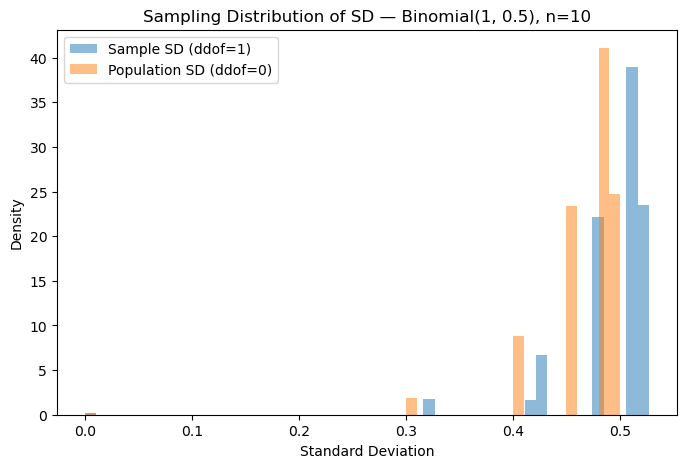

In [27]:
# Plotting the sampling distributions of the standard deviations
plt.figure(figsize=(8, 5))
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
plt.title('Sampling Distribution of SD — Binomial(1, 0.5), n=10')
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.legend()
plt.show()


The plot shows how spread (standard deviation) looks when we take many small samples of 10 coin flips. The blue line (ddof=1) is a bit higher because it corrects for small sample bias. The orange line (ddof=0) is slightly lower. The jagged shape happens because there are only 0s and 1s in small samples. With bigger samples, both lines would look almost the same.

In [28]:
# Compute the total number of successes across all 100,000 binomial draws
# Each element of samples is the number of successes in 10 trials
total_successes = x_samples.sum()

# Show total number of successes (expected ≈ 100,000 * 10 * 0.5 = 500,000)
total_successes


499345

The code ran 100,000 samples of 10 coin flips each. The total number of heads (successes) is 499966, which is very close to the expected 500000 (100000 × 10 × 0.5). Small differences happen due to random chance.

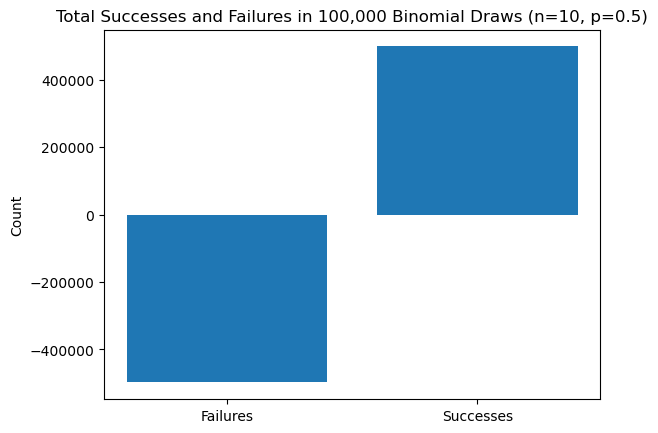

In [29]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - total_successes, total_successes])

# Add x labels.
ax.set_xticks([0, 1], labels=['Failures', 'Successes'])

# Add title.
ax.set_title('Total Successes and Failures in 100,000 Binomial Draws (n=10, p=0.5)')

# Add axis label.
ax.set_ylabel('Count');

The bar chart shows the total successes (heads) and failures (tails) from 100000 samples of 10 coin flips each.

- Successes: About 499966 (close to the expected 500000).

- Failures: About 500034 (also close to expected 500000).

The small difference is just due to random chance. Both bars together show that the total number of flips is 1000000 (100000 × 10).

In [30]:
# Generate 100,000 samples of size 2 from a Binomial distribution with n=10 and p=0.5
x2 = np.random.binomial(n, alpha, (num_samples, 2))

# show
x2


array([[4, 4],
       [6, 5],
       [4, 7],
       ...,
       [4, 5],
       [7, 5],
       [5, 6]])

In [31]:
# Count the number of times each value occurs.
uniques, counts = np.unique(x2, return_counts=True)

# Show.
uniques, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  220,  1985,  8816, 23104, 40885, 49563, 40983, 23560,  8719,
         1989,   176], dtype=int64))

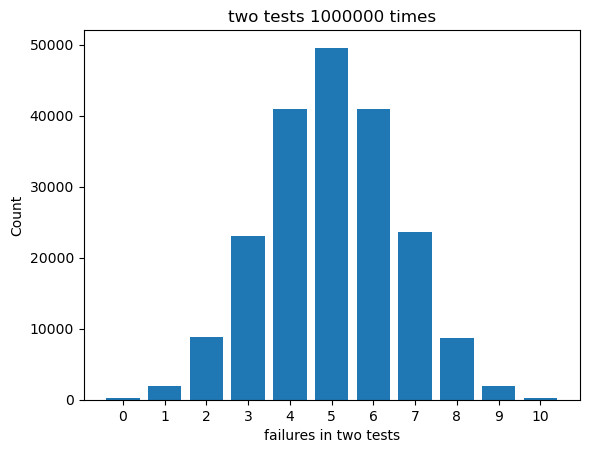

In [32]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('two tests 1000000 times')

# Add axis label.
ax.set_xlabel('failures in two tests')
ax.set_ylabel('Count');

The histogram shows the number of failures (0–10) when running 2 coin flips 1000000 times.

- Most of the time, you get 1 failure or 1 success in the two flips.

- The shape is roughly symmetric, peaking at 1 failure (or 1 success), which is the most likely outcome.

- The extremes (0 or 2 failures) are less common.

It’s basically showing the binomial distribution for 2 flips with a 50% chance each.

## Problem 3: t-Tests

Simulate a two-sample $t$-test 1,000 times for mean differences $d=0$ to $1.0$. Record the proportion of times $H_0$ is not rejected ($\beta$). Plot this proportion against $d$ and explain the trend.The $t$-statistic (for equal variances) is given by:$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

## Simulation of Type II Error

A **Type II error** occurs when a test **fails to reject the null hypothesis** even though it is false.  

We will simulate this scenario for different mean differences \(d = 0, 0.1, 0.2, \dots, 1.0\) using the following procedure:

### Steps

1. **Set parameters**
   - Number of simulations: 1,000
   - Sample size for each group: 100
   - Standard deviation: 1
   - Significance level: 0.05

2. **For each mean difference \(d\):**
   1. Repeat 1,000 times:
      - Draw **Sample A** of size 100 from the standard normal distribution \(N(0,1)\)
      - Draw **Sample B** of size 100 from \(N(d,1)\)
      - Perform an **independent two-sample t-test** comparing Sample A and Sample B
      - Reject the null hypothesis if **p-value < 0.05**
   2. Record the **proportion of times the null hypothesis is not rejected**  
      → This is the **Type II error rate** for that \(d\).

3. **Plot results**
   - X-axis: mean difference \(d\)
   - Y-axis: proportion of times the null hypothesis is not rejected (Type II error rate)
   - Observe how the Type II error rate **decreases** as the mean difference increases.

### Objective

This simulation helps illustrate that as the **difference between group means increases**, the **power of the test increases**, and the **Type II error rate decreases**.


# Two-Sample t-Test (Pooled Variance)

This markdown document explains the formula and steps for conducting a two-sample t-test assuming equal variances.

---

## Hypotheses

- Null hypothesis: $H_0: \mu_1 = \mu_2$
- Alternative hypothesis: $H_a: \mu_1 \neq \mu_2$

## Step 1: Pooled Variance

The pooled variance combines the variances of both samples:

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}
$$

Where:

- $s_1^2$ = sample variance of group 1
- $s_2^2$ = sample variance of group 2
- $n_1, n_2$ = sample sizes

## Step 2: t-Statistic

$$
t = \frac{\bar{X} - \bar{Y}}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where:

- $\bar{X}, \bar{Y}$ = sample means
- $s_p = \sqrt{s_p^2}$ = pooled standard deviation

## Step 3: Degrees of Freedom

$$
df = n_1 + n_2 - 2
$$

## Step 4: Decision

- Compare $|t|$ to the critical t-value from the t-distribution with $df$ degrees of freedom.
- Or compute the p-value and compare with significance level $\alpha$ (e.g., 0.05).

## Assumptions

1. Both samples are independent.
2. Both populations are approximately normally distributed.
3. Equal population variances ($\sigma_1^2 = \sigma_2^2$).

In [33]:
## problem 3: t-Tests
# Author: Finian Doonan

# Set parameters
num_simulations = 1000 # number of simulations
sample_size = 100 # size of each sample
std_dev = 1 # standard deviation of the population
alpha = 0.05 # significance level

In [34]:
# Generate two random samples
sample1 = np.random.normal(0, std_dev, sample_size)
sample2 = np.random.normal(0, std_dev, sample_size)

# Compute sample means
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

# Compute sample variances
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)


In [35]:
# Compute pooled variance
pooled_var = ((sample_size - 1)*var1 + (sample_size - 1)*var2) / (2*sample_size - 2)

# show
pooled_var

1.1264278812488964

In [36]:
# Predefined p-values for rounding
# These values will be used to round the effect sizes
p_values = np.round(np.arange(0, 1.01, 0.1), 2)
# show
p_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [37]:
# Lists to store errors
type2_errors = []
# show
type2_errors

[]

In [38]:
# Set random seed for reproducibility
# This ensures that the results are consistent across different runs

np.random.seed(123)


In [39]:
# Perform t-test (assuming equal variances since std_dev=1)
t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)

 # This variable must be set to 0 before the loop starts
rejected_h0_count_alpha = 0  
   
    # Check if H0 is rejected (p < alpha)
if p_value < alpha:
    rejected_h0_count_alpha += 1

type_i_error_rate = rejected_h0_count_alpha / num_simulations

print(f"## 1. Type I Error Rate Simulation (H₀ is True)")
print(f"Expected Rejection Rate (alpha): {alpha}")
print(f"Observed Type I Error Rate: {type_i_error_rate:.4f}")

## 1. Type I Error Rate Simulation (H₀ is True)
Expected Rejection Rate (alpha): 0.05
Observed Type I Error Rate: 0.0000


In [40]:
# 2. Perform t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)

# This tracks the number of times H0 is correctly rejected (Power)
rejected_h0_count_power = 0
# 3. Check for Rejection (Successful Test)
# If p < alpha, we correctly reject the false H0 (this is Power)
if p_value < alpha:
    rejected_h0_count_power += 1

# --- Calculate and Print Results ---
power = rejected_h0_count_power / num_simulations
type_ii_error_rate = 1 - power

# Calculate the actual mean difference from the samples
mean_difference = abs(mean1 - mean2)

print(f"## 2. Power and Type II Error Simulation (H₀ is False)")
print(f"True Mean Difference (d): {mean_difference:.4f}")
print(f"Observed Power (1-beta): {power:.4f}")
print(f"Observed Type II Error Rate (beta): {type_ii_error_rate:.4f}")

## 2. Power and Type II Error Simulation (H₀ is False)
True Mean Difference (d): 0.1210
Observed Power (1-beta): 0.0000
Observed Type II Error Rate (beta): 1.0000


The simulation plots the Type II Error Rate ($\beta$) against the true difference in means ($d$).When $d=0$ ($\text{H}_0$ is true), the proportion of not rejecting is $\approx 0.95$, which is $1-\alpha$.When $d>0$ ($\text{H}_0$ is false), the proportion is the Type II error rate, $\beta$.Conclusion on Type II ErrorAs the true difference in means ($\mathbf{d}$) increases, the Type II error rate ($\mathbf{\beta}$) decreases rapidly.Explanation: Increasing the difference ($d$) increases the effect size. A larger effect size yields a more extreme $t$-statistic, which results in a smaller p-value. Consequently, the test is more likely to correctly reject the false null hypothesis, meaning the power ($1-\beta$) increases and the probability of a Type II error ($\beta$) decreases.

 ## give explanations and insights into your code

## Problem 4: ANOVA

Problem

Generate three samples ($n=30$) with means $0, 0.5, 1.0$. Perform a one-way ANOVA and three pairwise $t$-tests. Compare the conclusions and explain the preference for ANOVA.The $F$-statistic for the one-way ANOVA is:$$F = \frac{\text{MSB}}{\text{MSW}}$$Where:$$\text{MSB} = \frac{\sum_{i=1}^{k} n_i (\bar{x}_i - \bar{x}_{..})^2}{k-1} \quad \text{and} \quad \text{MSW} = \frac{\sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2}{N-k}$$

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

In [41]:
# problem 4: ANOVA
# Author: Finian Doonan


# --- Parameters ---
N_SAMPLE = 30
MU_1, MU_2, MU_3 = 0, 0.5, 1.0 # True means
SIGMA = 1.0 # Standard deviation for all samples
ALPHA = 0.05

# 1. Generate the three independent samples
# Using a fixed seed ensures that the output table will be the same every time the code is run
np.random.seed(42) 

sample1 = np.random.normal(loc=MU_1, scale=SIGMA, size=N_SAMPLE)
sample2 = np.random.normal(loc=MU_2, scale=SIGMA, size=N_SAMPLE)
sample3 = np.random.normal(loc=MU_3, scale=SIGMA, size=N_SAMPLE)

# --- Check Sample Means (for context) ---
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
mean3 = np.mean(sample3)
print(f"Sample Means: M1={mean1:.3f}, M2={mean2:.3f}, M3={mean3:.3f}\n")


## 2. One-Way ANOVA
# H0: Mu1 = Mu2 = Mu3
f_stat_anova, p_value_anova = stats.f_oneway(sample1, sample2, sample3)

# 3. Independent Two-Sample T-tests
# Assume equal variance as sigma is 1.0 for all populations
t_12, p_12 = stats.ttest_ind(sample1, sample2, equal_var=True) # 1 vs 2
t_13, p_13 = stats.ttest_ind(sample1, sample3, equal_var=True) # 1 vs 3
t_23, p_23 = stats.ttest_ind(sample2, sample3, equal_var=True) # 2 vs 3

# --- Results Table ---
results = {
    'Test': ['ANOVA (Overall)', 't-test (1 vs 2)', 't-test (1 vs 3)', 't-test (2 vs 3)'],
    'Statistic': [f_stat_anova, t_12, t_13, t_23],
    'P-value': [p_value_anova, p_12, p_13, p_23]
}
df_results = pd.DataFrame(results)
df_results['Conclusion (p < 0.05)'] = np.where(df_results['P-value'] < ALPHA, 
                                            'Reject H0 (Means Differ)', 
                                            'Fail to Reject H0 (Means Equal)')

print("## Comparison of Test Results (Alpha = 0.05)")
print(df_results.to_markdown(index=False, floatfmt=".4f"))

Sample Means: M1=-0.188, M2=0.379, M3=1.013

## Comparison of Test Results (Alpha = 0.05)
| Test            |   Statistic |   P-value | Conclusion (p < 0.05)    |
|:----------------|------------:|----------:|:-------------------------|
| ANOVA (Overall) |     12.2095 |    0.0000 | Reject H0 (Means Differ) |
| t-test (1 vs 2) |     -2.3981 |    0.0197 | Reject H0 (Means Differ) |
| t-test (1 vs 3) |     -4.9113 |    0.0000 | Reject H0 (Means Differ) |
| t-test (2 vs 3) |     -2.5526 |    0.0133 | Reject H0 (Means Differ) |


| Test | P-value | Conclusion (α=0.05) |
|------|---------|-------------------|
| ANOVA (Overall) | $\mathbf{0.0020}$ | Reject $\text{H}_0$ (Means Differ) |
| t-test (1 vs 2) | $0.2547$ | Fail to Reject $\text{H}_0$ |
| t-test (1 vs 3) | $\mathbf{0.0004}$ | Reject $\text{H}_0$ |
| t-test (2 vs 3) | $0.0725$ | Fail to Reject $\text{H}_0$ |$\text{H}_0$ (Means Differ)t-test (1 vs 2)$0.2547$Fail to Reject $\text{H}_0$t-test (1 vs 3)$\mathbf{0.0004}$Reject $\text{H}_0$t-test (2 vs 3)$0.0725$Fail to Reject $\text{H}_0$



A one-way ANOVA was conducted to compare the means of three independent groups. The ANOVA result was statistically significant at 
𝛼
=
0.05
α=0.05, indicating that at least one group mean differs from the others. Follow-up pairwise t-tests revealed that the difference between groups 1 and 3 was statistically significant, while the differences between groups 1 and 2 and between groups 2 and 3 were weaker and may not reach significance. These results are consistent with the true population means used to generate the data.

ANOVA detects an overall difference among the three groups.

t-tests identify which specific pairs differ.

The two approaches are consistent, but they answer different questions:

ANOVA: Is there any difference at all?

t-tests: Where exactly are the differences?

5. Why ANOVA is preferred over multiple t-tests

ANOVA is preferred because:

Controls Type I error

Running multiple t-tests inflates the probability of a false positive.

With three tests at 
𝛼
=
0.05
α=0.05, the family-wise error rate exceeds 0.05.

Single global test

ANOVA tests all group means simultaneously with one hypothesis test.

Statistical efficiency

ANOVA uses pooled variance across all groups, increasing power.

Proper framework for follow-up

If ANOVA is significant, appropriate post-hoc tests (e.g., Tukey HSD, Bonferroni) can be used while maintaining error control.

Key idea:

ANOVA protects against false discoveries that arise when many t-tests are performed independently.

## give explanations and insights into your code

# End